Git submission

In [1]:
from google.colab import drive
import os

gdrive_path='/content/gdrive/MyDrive'

# This will mount your google drive under 'MyDrive'
drive.mount('/content/gdrive', force_remount=True)
# In order to access the files in this notebook we have to navigate to the correct folder
os.chdir(gdrive_path)
# Check manually if all files are present
print(sorted(os.listdir()))

Mounted at /content/gdrive
['.git', 'Colab Notebooks', 'Flicker8k_Dataset', 'German', 'Image Processing', 'ImageCaptioning', '__pycache__', 'additional_homework', 'data_loader.py', 'datasets', 'descriptions.txt', 'epam', 'features256.pkl', 'features4096.pkl', 'homework_09', 'homework_10', 'model.png', 'model.py', 'my_checkpoint.pth.tar', 'my_checkpoint_train_data.pth.tar', 'output', 'project_files', 'runs', 'save.txt', 'save.txt.pub', 'test.pkl', 'text', 'torch_mapping.pkl', 'train.pkl']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import keras
from os import listdir
from pickle import dump
import torch
import torch.nn as nn
import torchvision.models as models
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.layers import Dense, Input
import pickle
from tqdm import tqdm
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from data_loader import get_loader
from model import DecoderRNN


In [4]:
def extract_features(directory, embed_size = 256):

	model = VGG16()

	model = Model(inputs=model.inputs, outputs=model.layers[-4].output)


	features = {}

	for name in listdir(directory):
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		image = img_to_array(image)
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		image = preprocess_input(image)
		feature = model.predict(image, verbose=0)
		linear_layer = Dense(embed_size, activation=None)(feature)
		image_id = name.split('.')[0]
		features[image_id] = linear_layer
		print('>%s' % name)
	return features

In [4]:
# directory = 'Flicker8k_Dataset'
# features = extract_features(directory)
# print('Extracted Features: %d' % len(features))
# #save to file
# dump(features, open('features.pkl', 'wb'))

In [5]:
with open('features4096.pkl', 'rb') as f:
    data = pickle.load(f)
torch_mapping = {}
for i in data:
  torch_mapping[i] = torch.from_numpy(data[i])

dump(torch_mapping, open('torch_mapping.pkl', 'wb'))


In [5]:
with open('torch_mapping.pkl', 'rb') as f:
    mappings = pickle.load(f)

#Train test split


In [6]:
split = int(len(mappings) * 0.9)
keys = list(mappings.keys())
train_keys = keys[:split]
test_keys = keys[split:]

train = {key: mappings[key] for key in train_keys}
test = {key: mappings[key] for key in test_keys}

dump(train, open('train.pkl', 'wb'))

#Check the size of the features

In [8]:
len(mappings["1358089136_976e3d2e30"]) # size is (1,4096)
features_shape = mappings["1358089136_976e3d2e30"][0].shape[0]
print(len(mappings["1358089136_976e3d2e30"][0]))

4096


# Bring the captions file to the right format

Using it only one time to create a file out of the original data to make it work for our dataloader

In [8]:

# import pandas as pd

# file_path = "text/Flickr8k.token.txt"
# captions_df = pd.read_csv(file_path, sep='\t', names=['image_id', 'captions'])

# captions_df['image'] = captions_df['image_id'].str.split('.').str[0]

# captions_df = captions_df[['image', 'captions']]

# output_path = "text/captions.csv"
# captions_df.to_csv(output_path, index=False)

# captions_df.head()


# Training

In [6]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime
!rm -rf ./logs/

Epoch [1/100], Loss: 4.5567


Epoch [2/100], Loss: 3.8859


Epoch [3/100], Loss: 3.6073


Epoch [4/100], Loss: 3.4273


Epoch [5/100], Loss: 3.2921


Epoch [6/100], Loss: 3.1837


Epoch [7/100], Loss: 3.0897


Epoch [8/100], Loss: 3.0100


Epoch [9/100], Loss: 2.9388


Epoch [10/100], Loss: 2.8761
=> Saving checkpoint


Epoch [11/100], Loss: 2.8164


Epoch [12/100], Loss: 2.7632


Epoch [13/100], Loss: 2.7121


Epoch [14/100], Loss: 2.6673


Epoch [15/100], Loss: 2.6240


Epoch [16/100], Loss: 2.5821


Epoch [17/100], Loss: 2.5432


Epoch [18/100], Loss: 2.5069


Epoch [19/100], Loss: 2.4724


Epoch [20/100], Loss: 2.4383
=> Saving checkpoint


Epoch [21/100], Loss: 2.4090


Epoch [22/100], Loss: 2.3802


Epoch [23/100], Loss: 2.3508


Epoch [24/100], Loss: 2.3240


Epoch [25/100], Loss: 2.2978


Epoch [26/100], Loss: 2.2737


Epoch [27/100], Loss: 2.2493


Epoch [28/100], Loss: 2.2279


Epoch [29/100], Loss: 2.2041


Epoch [30/100], Loss: 2.1824
=> Saving checkpoint


Epoch [31/100], Loss: 2.1647


Epoch [32/100], Loss: 2.1428


Epoch [33/100], Loss: 2.1242


Epoch [34/100], Loss: 2.1080


Epoch [35/100], Loss: 2.0858


Epoch [36/100], Loss: 2.0728


Epoch [37/100], Loss: 2.0551


Epoch [38/100], Loss: 2.0380


Epoch [39/100], Loss: 2.0218


Epoch [40/100], Loss: 2.0066
=> Saving checkpoint


Epoch [41/100], Loss: 1.9921


Epoch [42/100], Loss: 1.9783


Epoch [43/100], Loss: 1.9646


Epoch [44/100], Loss: 1.9488


Epoch [45/100], Loss: 1.9353


Epoch [46/100], Loss: 1.9230


Epoch [47/100], Loss: 1.9094


Epoch [48/100], Loss: 1.8986


Epoch [49/100], Loss: 1.8835


Epoch [50/100], Loss: 1.8745
=> Saving checkpoint


Epoch [51/100], Loss: 1.8593


Epoch [52/100], Loss: 1.8530


Epoch [53/100], Loss: 1.8391


Epoch [54/100], Loss: 1.8305


Epoch [55/100], Loss: 1.8169


Epoch [56/100], Loss: 1.8081


Epoch [57/100], Loss: 1.7978


Epoch [58/100], Loss: 1.7877


Epoch [59/100], Loss: 1.7769


Epoch [60/100], Loss: 1.7670
=> Saving checkpoint


Epoch [61/100], Loss: 1.7580


Epoch [62/100], Loss: 1.7484


Epoch [63/100], Loss: 1.7429


Epoch [64/100], Loss: 1.7347


Epoch [65/100], Loss: 1.7243


Epoch [66/100], Loss: 1.7182


Epoch [67/100], Loss: 1.7072


Epoch [68/100], Loss: 1.6986


Epoch [69/100], Loss: 1.6917


Epoch [70/100], Loss: 1.6816
=> Saving checkpoint


Epoch [71/100], Loss: 1.6760


Epoch [72/100], Loss: 1.6706


Epoch [73/100], Loss: 1.6622


Epoch [74/100], Loss: 1.6540


Epoch [75/100], Loss: 1.6510


Epoch [76/100], Loss: 1.6391


Epoch [77/100], Loss: 1.6335


Epoch [78/100], Loss: 1.6256


Epoch [79/100], Loss: 1.6194


Epoch [80/100], Loss: 1.6142
=> Saving checkpoint


Epoch [81/100], Loss: 1.6097


Epoch [82/100], Loss: 1.5984


Epoch [83/100], Loss: 1.5969


Epoch [84/100], Loss: 1.5879


Epoch [85/100], Loss: 1.5836


Epoch [86/100], Loss: 1.5757


Epoch [87/100], Loss: 1.5727


Epoch [88/100], Loss: 1.5647


Epoch [89/100], Loss: 1.5591


Epoch [90/100], Loss: 1.5542
=> Saving checkpoint


Epoch [91/100], Loss: 1.5472


Epoch [92/100], Loss: 1.5443


Epoch [93/100], Loss: 1.5367


Epoch [94/100], Loss: 1.5325


Epoch [95/100], Loss: 1.5263


Epoch [96/100], Loss: 1.5266


Epoch [97/100], Loss: 1.5152


Epoch [98/100], Loss: 1.5091


Epoch [99/100], Loss: 1.5080


Epoch [100/100], Loss: 1.5018


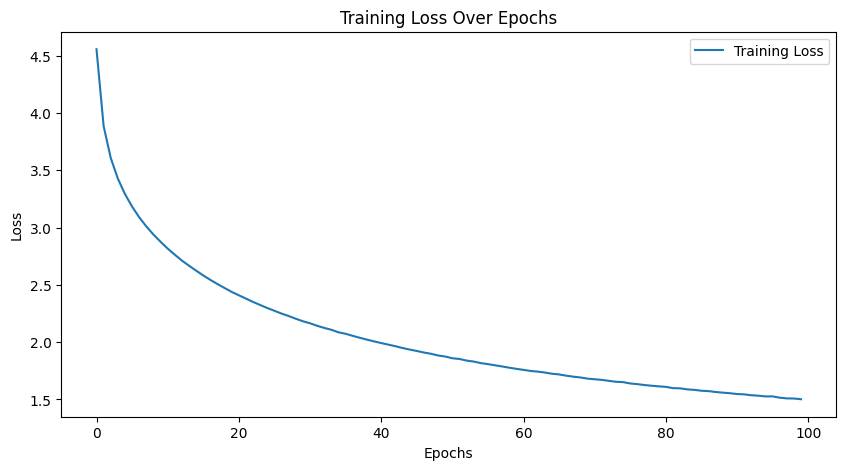

In [13]:
def save_checkpoint(state, filename="my_checkpoint_train_data.pth.tar"):
    print("=> Saving checkpoint")
    torch.save(state, filename)

def train():

    train_loader, dataset = get_loader(
        root_folder="train.pkl",
        annotation_file="text/captions.csv",
        num_workers=2,
    )

    torch.backends.cudnn.benchmark = True
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    load_model = False
    save_model = True
    train_CNN = False

    embed_size = 256
    hidden_size = 256
    vocab_size = len(dataset.vocab)
    num_layers = 1
    learning_rate = 3e-4
    num_epochs = 100

    writer = SummaryWriter("runs/flickr")
    step = 0

    model = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.word_to_index["<pad>"])
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_history = []
    model.train()

    for epoch in range(num_epochs):
        epoch_loss = 0
        if save_model and epoch%10 == 0 and epoch !=0:
            checkpoint = {
                "state_dict": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "step": step,
            }
            save_checkpoint(checkpoint)

        for idx, (imgs, captions) in tqdm(
            enumerate(train_loader), total=len(train_loader), leave=False
        ):
            imgs = imgs.to(device)
            captions = captions.to(device)

            outputs = model(imgs, captions[:-1])
            loss = criterion(
                outputs.reshape(-1, outputs.shape[2]), captions.reshape(-1)
            )

            writer.add_scalar("Training loss", loss.item(), global_step=step)
            step += 1

            optimizer.zero_grad()
            loss.backward(loss)
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(loss_history, label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    train()

# Load the model

In [7]:
train_loader, dataset = get_loader(
        root_folder="train.pkl",
        annotation_file="text/captions.csv",
        num_workers=2,
    )
embed_size = 256
hidden_size = 256
vocab_size = len(dataset.vocab)
num_layers = 1
learning_rate = 3e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # initialize model, loss etc
model = DecoderRNN(embed_size, hidden_size, vocab_size, num_layers)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
def load_checkpoint(checkpoint, model, optimizer):
    print("=> Loading checkpoint")
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])
    step = checkpoint["step"]
    return step

In [9]:
my_model = load_checkpoint(torch.load("my_checkpoint_train_data.pth.tar"), model, optimizer)

<ipython-input-9-5fcaea3ad62c>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  my_model = load_checkpoint(torch.load("my_checkpoint_train_data.pth.tar"), model, optimizer)


=> Loading checkpoint


In [10]:
test_images = test
test_keys = list(test_images.keys())

# Calculating BLEU score

Create original and predicted pairs

get the first original caption for test images

In [11]:
def split_by_first_space(line):
    image_id, caption = line.split(" ", 1)
    return image_id, caption.strip()


with open("descriptions.txt", "r") as file:
    data = [split_by_first_space(line) for line in file]

captions_df = pd.DataFrame(data, columns=["image_id", "caption"])

original_captions = {}

for i in test_keys:
    if i in captions_df['image_id'].values:

        original_captions[i] = captions_df.loc[captions_df['image_id'] == i, 'caption'].iloc[0]

In [12]:

predicted_captions = {}

predicted_captions = {key: model.caption_image(test[key], dataset.vocab) for key in test_keys}
model.train()

DecoderRNN(
  (sq): Linear(in_features=4096, out_features=256, bias=True)
  (embed): Embedding(2776, 256, padding_idx=0)
  (lstm): LSTM(256, 256)
  (linear): Linear(in_features=256, out_features=2776, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [13]:
# print(predicted_captions)
# print(original_captions)
# print(len(predicted_captions))
# print(len(original_captions))

In [14]:
# from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

# for ref, cand in zip(original_captions, predicted_captions):
#     score = sentence_bleu([ref], cand)  # Pass cand directly as it's already a list of words
#     print(f"BLEU Score: {score:.4f}")
# corpus_score = corpus_bleu([[ref] for ref in original_captions], predicted_captions)  # Pass predicted_captions directly
# print(f"Corpus BLEU Score: {corpus_score:.4f}")

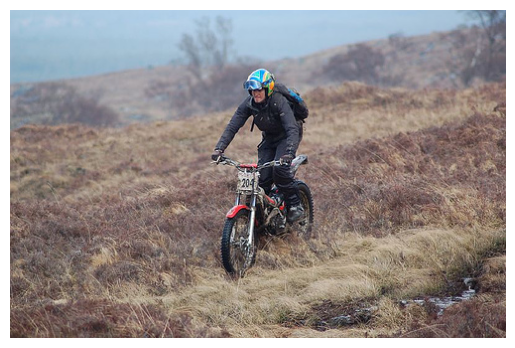

Original Caption: man riding his bike on hill
Predicted Caption: <start> man wearing red helmet rides his bike through the woods <end>


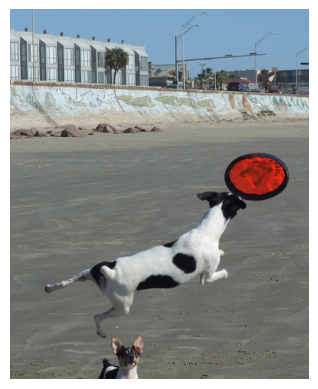

Original Caption: black and white dog is jumping up to catch toy as another dog watches
Predicted Caption: <start> dog leaps high the air catch ball <end>


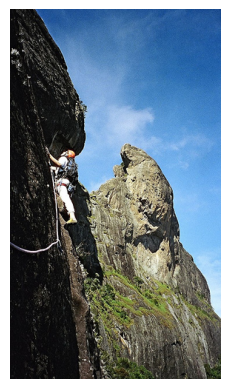

Original Caption: man wearing backpack is climbing rock
Predicted Caption: <start> person climbing the mountain <end>


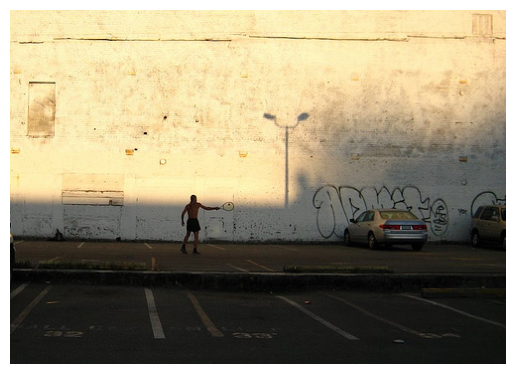

Original Caption: man in the near distance is pointing to silver sedan near him
Predicted Caption: <start> person jeans and shirt sits cross street with cars <end>


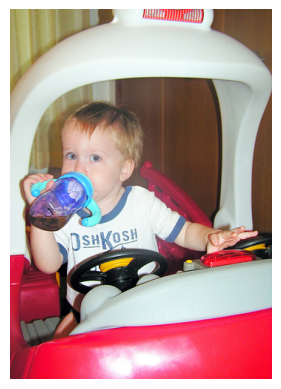

Original Caption: boy sits in toy car while drinking from his sippy cup
Predicted Caption: <start> the little boy sitting the seat with his toy <end>


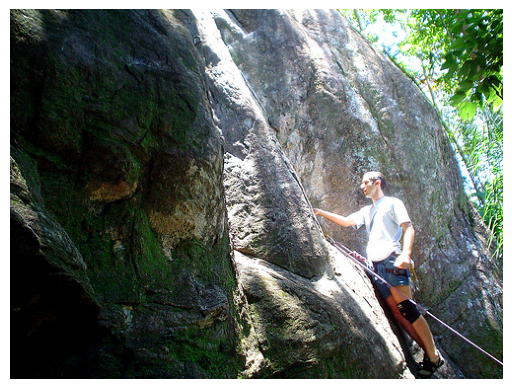

Original Caption: boy climbing rock face
Predicted Caption: <start> man yellow shirt climbs rock face <end>


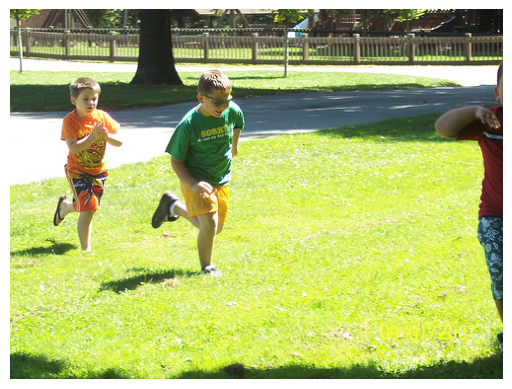

Original Caption: kids running across the grass
Predicted Caption: <start> two girls are playing soccer <end>


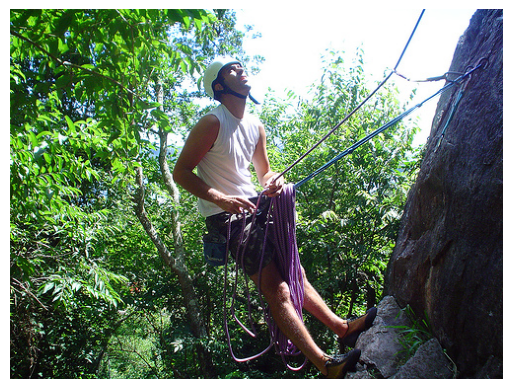

Original Caption: man in harness climbing rock wall
Predicted Caption: <start> woman maroon shirt and jeans attempts climb tree <end>


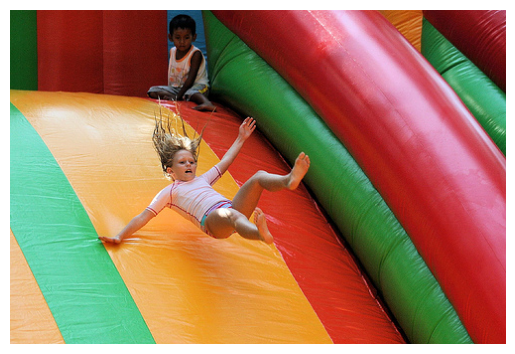

Original Caption: child slides down colorful slide while another child watches
Predicted Caption: <start> girl red shirt rides skateboard down red plastic red tunnel <end>


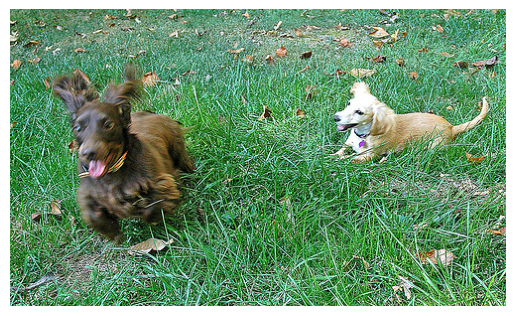

Original Caption: brown dog and tan dog are playing in tall grass
Predicted Caption: <start> two small dogs running the grass <end>


In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

some_test_examples = test_keys[50:60]
for i in some_test_examples:
    image_path = f"Flicker8k_Dataset/{i}.jpg"
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')  # Turn off the axis for better visualization
    plt.show()
    print("Original Caption:", original_captions[i])
    print("Predicted Caption:", " ".join(predicted_captions[i]))
